In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/127.1 kB ? eta -:--:--
   -------------------------------------- - 122.9/127.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 127.1/127.1 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.6 MB 7.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 10.3 MB/s eta 0:00:00


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     -------------- ----------------------- 20.5/52.8 kB 131.3 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/52.8 kB 146.3 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 195.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     -------------------- ------------------ 61.4/116.4 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 7.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.1 MB 8.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.1 MB 12.5 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [11]:
tesla = yf.Ticker("TSLA")

In [12]:
tesla_data = tesla.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-12 00:00:00-05:00,441.230011,454.299988,438.000000,448.959991,61649600,0.0,0.0
2026-01-13 00:00:00-05:00,450.200012,451.809998,443.950012,447.200012,53719200,0.0,0.0
2026-01-14 00:00:00-05:00,442.809998,443.910004,434.220001,439.200012,57259500,0.0,0.0


In [13]:
tesla_data.reset_index(inplace=True)
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3908,2026-01-12 00:00:00-05:00,441.230011,454.299988,438.000000,448.959991,61649600,0.0,0.0
3909,2026-01-13 00:00:00-05:00,450.200012,451.809998,443.950012,447.200012,53719200,0.0,0.0
3910,2026-01-14 00:00:00-05:00,442.809998,443.910004,434.220001,439.200012,57259500,0.0,0.0
3911,2026-01-15 00:00:00-05:00,441.130005,445.359985,437.649994,438.570007,49465800,0.0,0.0


In [14]:
tesla_html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text

In [15]:
tesla_html_revenue = BeautifulSoup(tesla_html_data, 'html.parser')

In [17]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
tesla_q_revenue = tesla_html_revenue.find_all("tbody")[1]

for row in tesla_q_revenue.find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)

tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mirko\AppData\Local\Temp\ipykernel_944\2254789512.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [19]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [20]:
gamestop_data = yf.Ticker("GME")

In [21]:
gme_data = gamestop_data.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2026-01-12 00:00:00-05:00,21.080000,21.309999,20.920000,20.980000,3563700,0.0,0.0
2026-01-13 00:00:00-05:00,20.990000,21.209999,20.840000,21.020000,4121100,0.0,0.0
2026-01-14 00:00:00-05:00,21.000000,21.080000,20.790001,21.020000,4112800,0.0,0.0


In [22]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [23]:
gme_html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

In [24]:
gme_html_revenue = BeautifulSoup(gme_html_data,'html.parser')

In [25]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
gme_q_revenue = gme_html_revenue.find_all("tbody")[1]
gme_q_revenue

for row in gme_q_revenue.find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text

    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[Date], "Revenue":[Revenue]})], ignore_index=True)

gme_revenue

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [26]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mirko\AppData\Local\Temp\ipykernel_944\4206843796.py:1: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True)


,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


In [27]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


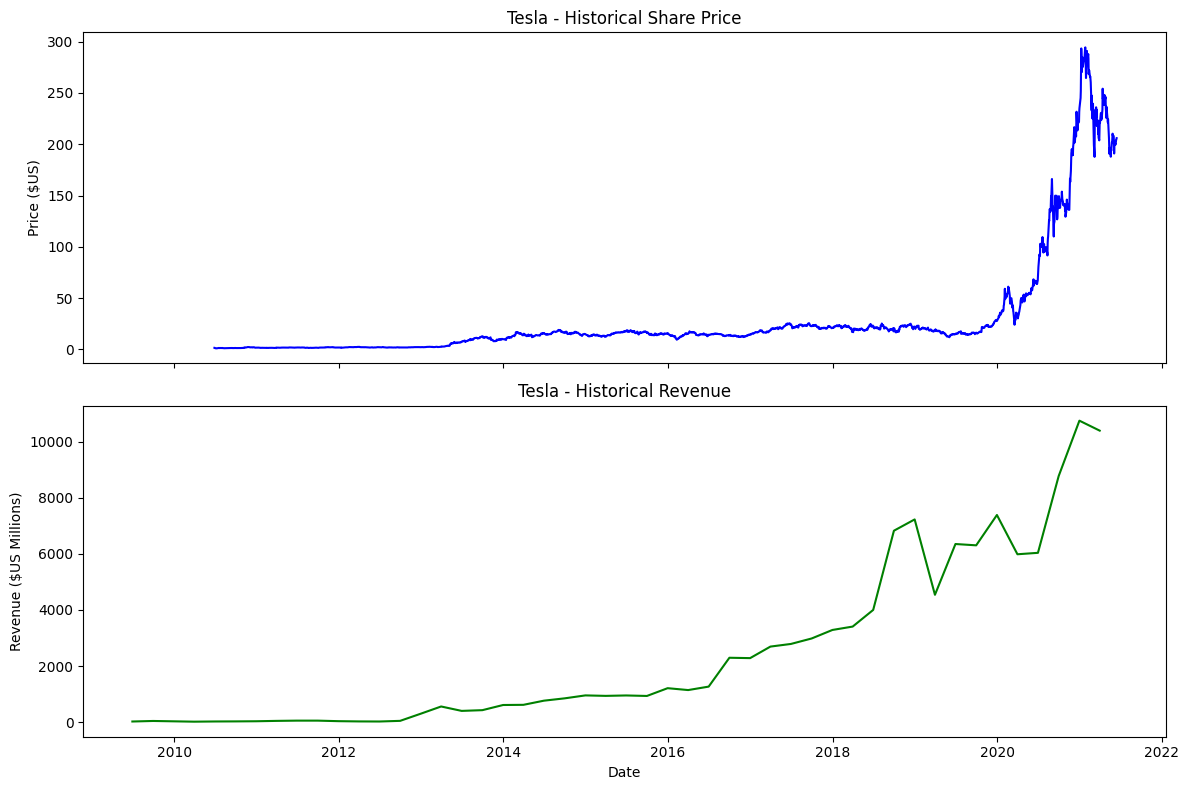

In [28]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

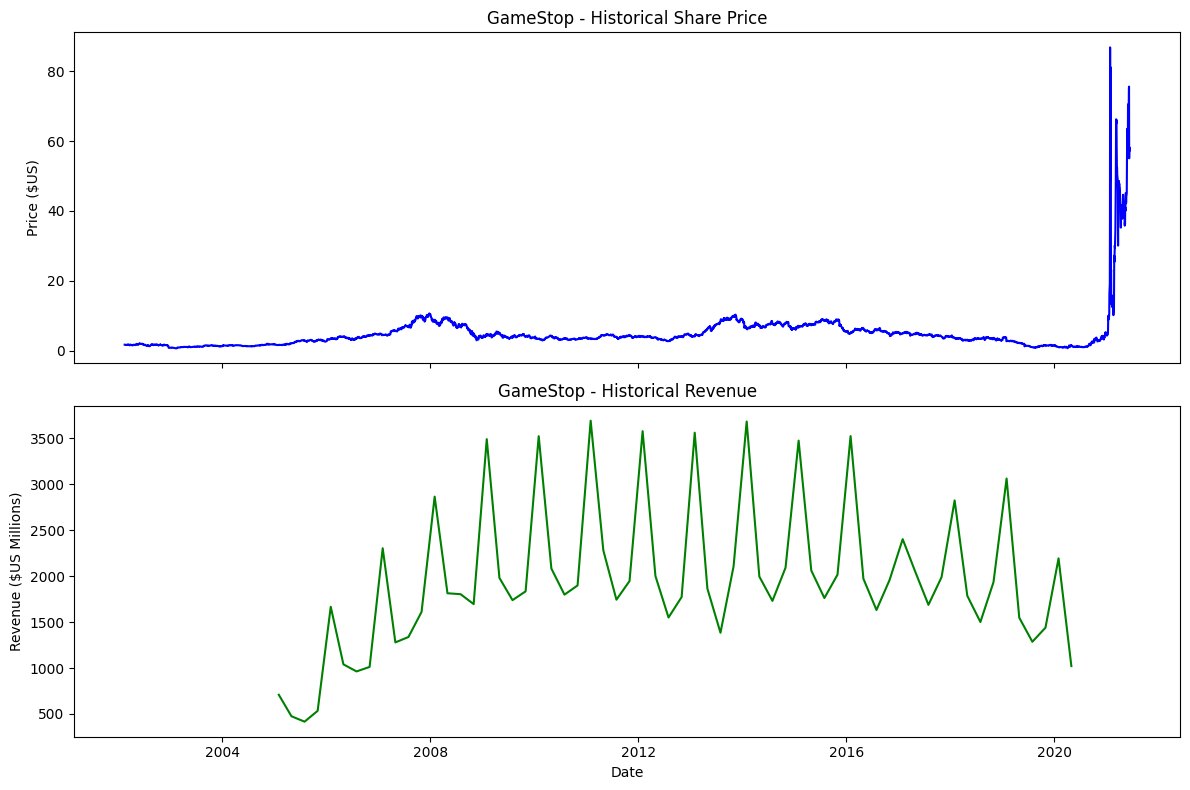

In [29]:
make_graph(gme_data, gme_revenue, 'GameStop')